### Lockdown in GERDA LIGHT

In [3]:
import os
import GERDA_light as gl 
import numpy as np
import logging as log
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from G_utils.p_matrix import contact_lists_from_p_l_t, get_lockdown_plt
%matplotlib inline

plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('seaborn-v0_8-paper')

In [467]:
#plt.style.available

In [2]:
dT=24
w1 = gl.World(
           p_l_t_filepath = 'src/Gangelt_03_new_p_l_t.gz',
           ai_df_filename = 'src/Gangelt_03_new_ai_df.gz',
           clustering=False,
           k_I=0.2,
           only_P1=False,
           dT=dT,
           )


INFO:root:create contact list


INFO:root:contact list is done
INFO:root:max cluster size: 1


In [453]:
dT=24
w2 = gl.World(
           p_l_t_filepath = 'src/Gangelt_01_new_p_l_t.gz',
           ai_df_filename = 'src/Gangelt_01_new_ai_df.gz',
           clustering=False,
           k_I=0.2,
           only_P1=False,
           dT=dT,
           )

INFO:root:create contact list
INFO:root:contact list is done
INFO:root:max cluster size: 1


In [456]:
T1=int(168/dT)
model = gl.SIS_model(w1,sim_id=1) 
for i in range(400,404):  # selected agent ID 
    model.world.agents[i].state=1 ## infect one agent
    model.world.agents[i].times['infection'] = 0 
model.run(timespan=T1, only_inf_rel_contacts=True, only_infection=True)
#model.world.contacts = lockdown_contacts

Generate lockdown plt from orignal plt for list of agents using their home location and overwrite  

In [460]:
## agent list for lockdowns
agents = [1,2,3,5,7,8,9]

In [5]:
old_plt = w1.p_l_t
new_plt = old_plt.copy()


In [474]:
agents=[]
timesteps = old_plt.shape[1] ## time 
new_plt = old_plt.copy()
if agents:
    home_locs = old_plt[agents][:,0]
else:
    home_locs = old_plt[:,0]

new_plt[agents] = np.array([home_locs]*timesteps).T

ValueError: shape mismatch: value array of shape (1060,168) could not be broadcast to indexing result of shape (0,168)

In [463]:
test_plt = np.array(
    [
        [1,1,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
        [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
        [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    ]
)
contact_lists_from_p_l_t(test_plt,max_t=4)
t2_plt = test_plt.copy()

test_plt
t2_plt[0,0]=3
test_plt

INFO:root:create contact list
INFO:root:contact list is done


array([[1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1]])

In [472]:
def get_lockdown_schedule(old_plt, agents:list=[]):

    new_plt = old_plt.copy()
    if agents:
        home_locs = old_plt[agents][:,0]
    else:
        home_locs = old_plt[:,0]
    timesteps = old_plt.shape[1] ## time 
    new_plt[agents] = np.array([home_locs]*timesteps).T
    return new_plt



In [6]:
new_plt = get_lockdown_plt(old_plt)

In [465]:
## create new contact dict for new schedule (lockdown)
new_plt = get_lockdown_schedule(old_plt)
lockdown_contacts =  contact_lists_from_p_l_t(new_plt,directed=False)
lockdown_contacts = gl.generate_condensed_inf_p_dict(lockdown_contacts, 168, dT)


ValueError: shape mismatch: value array of shape (1060,168) could not be broadcast to indexing result of shape (0,168)

In [ ]:
lockdown_contacts

{0: [(1, 2, (24.0, 276.0, 2024.0)),
  (2, 1, (24.0, 276.0, 2024.0)),
  (3, 4, (7.9999999999999964, 30.666666666666657, 74.96296296296296)),
  (3, 5, (7.9999999999999964, 30.666666666666657, 74.96296296296296)),
  (3, 6, (7.9999999999999964, 30.666666666666657, 74.96296296296296)),
  (4, 3, (7.9999999999999964, 30.666666666666657, 74.96296296296296)),
  (4, 5, (7.9999999999999964, 30.666666666666657, 74.96296296296296)),
  (4, 6, (7.9999999999999964, 30.666666666666657, 74.96296296296296)),
  (5, 3, (7.9999999999999964, 30.666666666666657, 74.96296296296296)),
  (5, 4, (7.9999999999999964, 30.666666666666657, 74.96296296296296)),
  (5, 6, (7.9999999999999964, 30.666666666666657, 74.96296296296296)),
  (6, 3, (7.9999999999999964, 30.666666666666657, 74.96296296296296)),
  (6, 4, (7.9999999999999964, 30.666666666666657, 74.96296296296296)),
  (6, 5, (7.9999999999999964, 30.666666666666657, 74.96296296296296)),
  (7, 8, (24.0, 276.0, 2024.0)),
  (8, 7, (24.0, 276.0, 2024.0)),
  (10, 11, (7

In [ ]:
ai_df = w1.ai_df

In [ ]:
ai_df[ai_df['home']==225]

home  h_ID       type  age  cluster  household_size  cluster_size
0     225   400  under_age   15      400               4             1
318   225   403      adult   41      403               4             1
885   225   401  under_age   17      401               4             1
998   225   402      adult   45      402               4             1

In [448]:
T1, T2 = int(336/dT), int(336/dT) 
T3 = int((2400 - T1 -T2)/dT) 
only_infection = True
AR_list = []
inf_days  =[]
contacts = w1.contacts.copy()

## create new contact dict for new schedule (lockdown)
old_plt = w1.p_l_t
new_plt = old_plt.copy()
new_plt = get_lockdown_schedule(old_plt)
lockdown_contacts =  contact_lists_from_p_l_t(new_plt,directed=False)
lockdown_contacts = gl.generate_condensed_inf_p_dict(lockdown_contacts, 168, dT)
##

for k in range(20):
    model = gl.SIS_model(w1,sim_id=k) 
    for i in range(400,404):  # selected agent ID 
        model.world.agents[i].state=1 ## infect one agent
        model.world.agents[i].times['infection'] = 0 
    model.run(timespan=T1, only_inf_rel_contacts=True, only_infection=only_infection)
    model.world.contacts = lockdown_contacts
    #ai_df = model.world.ai_df
    #print(len(ai_df[~ai_df['infection_time'].isna()]))
    model.run(timespan=T2, only_inf_rel_contacts=True, only_infection=only_infection)
    model.world.contacts = contacts
    model.run(timespan=T3, only_inf_rel_contacts=True, only_infection=only_infection)
    ai_df = model.world.ai_df
    ai_df['infection_day'] = ai_df[~ai_df['infection_time'].isna()]['infection_time'].map(lambda x: int(x*dT/24))
    
    inf_days.append(ai_df['infection_day'])
    AR_list.append(np.sum([~pd.isna(ai_df.infection_day)])/w1.n_agents)

    del model

ValueError: shape mismatch: value array of shape (1060,168) could not be broadcast to indexing result of shape (0,168)

In [353]:
model = gl.SIS_model(w1,sim_id=k) 
model.world.contacts

{0: [(1, 2, 1.0),
  (3, 4, 0.3333333333333333),
  (3, 5, 0.3333333333333333),
  (3, 6, 0.3333333333333333),
  (4, 5, 0.3333333333333333),
  (4, 6, 0.3333333333333333),
  (5, 6, 0.3333333333333333),
  (7, 8, 1.0),
  (10, 11, 0.3333333333333333),
  (10, 12, 0.3333333333333333),
  (10, 13, 0.3333333333333333),
  (11, 12, 0.3333333333333333),
  (11, 13, 0.3333333333333333),
  (12, 13, 0.3333333333333333),
  (15, 16, 1.0),
  (17, 18, 0.5),
  (17, 19, 0.5),
  (18, 19, 0.5),
  (22, 23, 1.0),
  (24, 25, 0.3333333333333333),
  (24, 26, 0.3333333333333333),
  (24, 27, 0.3333333333333333),
  (25, 26, 0.3333333333333333),
  (25, 27, 0.3333333333333333),
  (26, 27, 0.3333333333333333),
  (28, 29, 0.5),
  (28, 30, 0.5),
  (29, 30, 0.5),
  (32, 33, 0.3333333333333333),
  (32, 34, 0.3333333333333333),
  (32, 35, 0.3333333333333333),
  (33, 34, 0.3333333333333333),
  (33, 35, 0.3333333333333333),
  (34, 35, 0.3333333333333333),
  (37, 38, 0.5),
  (37, 39, 0.5),
  (38, 39, 0.5),
  (41, 42, 1.0),
  (44, 

In [376]:
### attack rate
print(AR_list)

[0.8319169027384324, 0.8791312559017942, 0.08970727101038715, 0.8611898016997167, 0.09348441926345609, 0.8545797922568461, 0.8885741265344664, 0.8649669499527857, 0.8574126534466477, 0.8923512747875354, 0.10009442870632672, 0.8791312559017942, 0.8413597733711048, 0.8640226628895185, 0.8621340887629839, 0.11237016052880075, 0.08593012275731822, 0.042492917847025496, 0.024551463644948063, 0.08120868744098206]


In [380]:
## infection events df
df = pd.concat(inf_days,axis=1)
ai_df[~pd.isna(ai_df['infection_day'])]

home  h_ID           type  age  cluster  household_size  cluster_size  \
0      225   400      under_age   15      400               4             1   
29     563  1057  public_worker   47     1057               6             1   
46     563  1055      under_age   14     1055               6             1   
88     281   514          adult   53      514               2             1   
97     433   807          adult   28      807               4             1   
...    ...   ...            ...  ...      ...             ...           ...   
998    225   402          adult   45      402               4             1   
1008   199   358          adult   67      358               5             1   
1010   563  1056          adult   39     1056               6             1   
1017   505   938          adult   48      938               4             1   
1023   199   356          adult   22      356               5             1   

      cluster_infection_time  Infection_timing_in_cluster  infection_time  \
0                        0.0                            0             0.0   
29                      19.0                            0            19.0   
46                      22.0                            0            22.0   
88                       8.0                            0             8.0   
97                      16.0                            0            16.0   
...                      ...                          ...             ...   
998                      0.0                            0             0.0   
1008                     6.0                            0             6.0   
1010                    14.0                            0            14.0   
1017                    20.0                            0            20.0   
1023                    11.0                            0            11.0   

      infection_day  
0               0.0  
29             19.0  
46             22.0  
88              8.0  
97             16.0  
...             ...  
998             0.0  
1008            6.0  
1010           14.0  
1017           20.0  
1023           11.0  

[86 rows x 11 columns]

array([<Axes: title={'center': 'infection_day'}>], dtype=object)

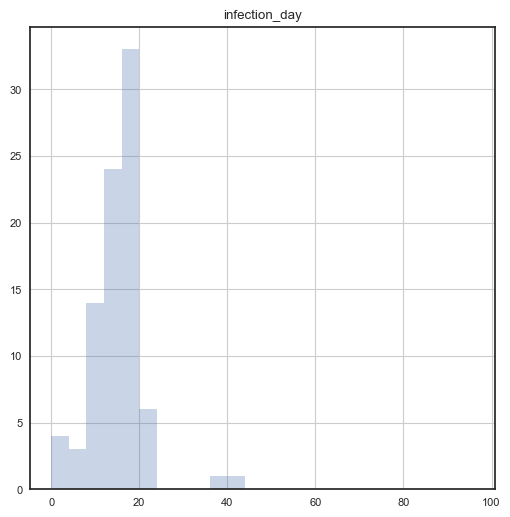

In [378]:
fig, ax = plt.subplots(1,1, figsize=(6,6), sharey=True)
ai_df.hist(['infection_day'],alpha=0.3, ax = ax, bins=np.arange(0,100,4))


NameError: name 'df' is not defined

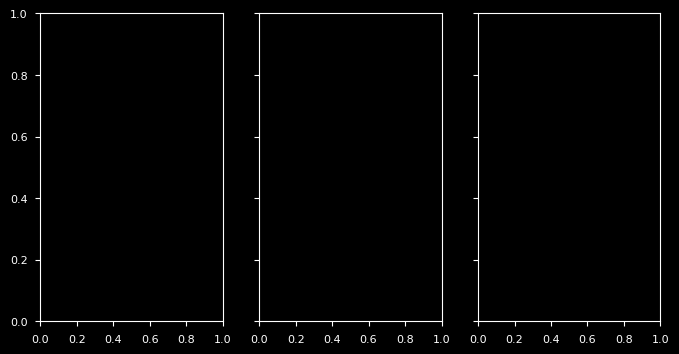

In [72]:
### infection events
##plots
bins = np.arange(0,100,4)

fig, axes = plt.subplots(1,3, figsize=(8,4), sharey=True)
#fig1, ax1 = plt.subplots(1,1, figsize=(6,6), sharey=True)
for l in range(df.shape[1]):
    df.iloc[:,l].hist(ax=axes[0],color='red',alpha=0.4,bins=np.arange(0,100,4),histtype='step',grid=False)
    sns.histplot(df.iloc[:,l], ax=axes[1],color='red',alpha=0.15,bins=np.arange(0,100,4))
    y,x = np.histogram(list(df.iloc[:,l][~pd.isna(df.iloc[:,l])].values), bins=bins)
    axes[2].plot(x[:-1],y, alpha=0.1, color='red')

axes[0].set_ylabel('infection events')
for ax in axes:
    ax.set_xlabel('time, days')
    ax.set_xlim(0,100)
    ax.set_ylim(-5,180)


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
/Users/bjoern/miniconda3/envs/net/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 32.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


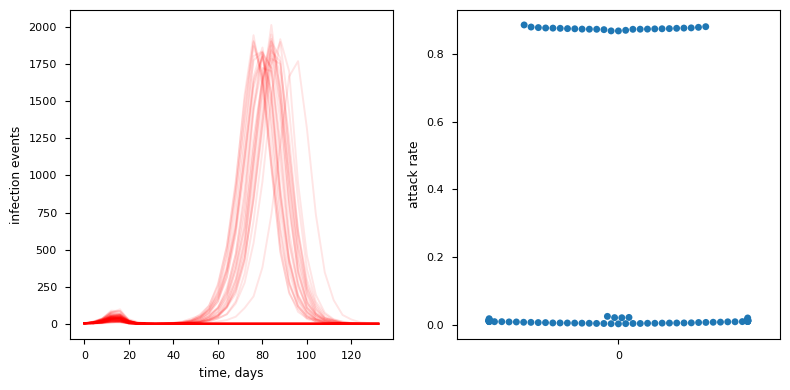

In [555]:
fig, axes = plt.subplots(1,2,figsize=(8,4))
df_inf = pd.read_csv('output_server/inf_times_day_lockdown_big_n_96_dT_24_dur_2688_T1_336_T2_504.csv')
df_inf.drop('Unnamed: 0',axis=1,inplace=True)
df_AR = pd.read_csv('output_server/AR_lockdown_big_n_96_dT_24_dur_2688_T1_336_T2_504.csv')
df_AR = df_AR.drop('Unnamed: 0',axis=1).T.reset_index(drop=True)

bins = np.arange(0,df_inf.max().max(),4)
for sim_id in df_inf.columns:
    #out_df.hist([sim_id],alpha=0.3, ax = ax, bins=np.arange(0,int(opt['simulation_time']/24),4))
    y,x = np.histogram(list(df_inf[sim_id][~pd.isna(df_inf[sim_id])].values), bins=bins)
    axes[0].plot(x[:-1],y, alpha=0.1, color='red')
axes[0].set_xlabel('time, days')
axes[0].set_ylabel('infection events')

sns.swarmplot(data=df_AR, ax=axes[1])
axes[1].set_ylabel('attack rate')
plt.tight_layout()
plt.savefig('plots/lockdown_big_dT24_336_504.png', dpi=150, bbox_inches='tight')
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
/Users/bjoern/miniconda3/envs/net/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


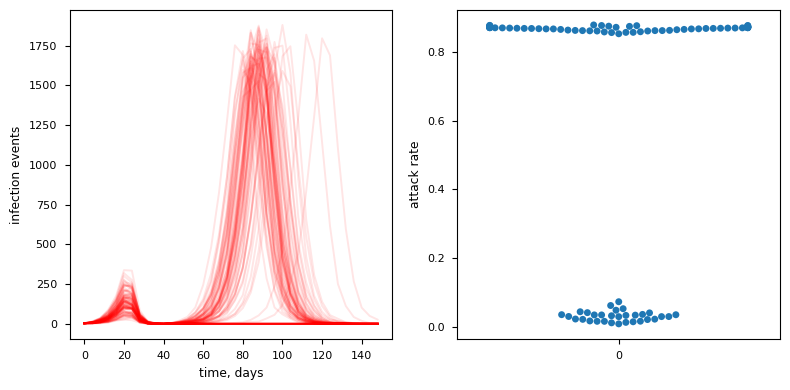

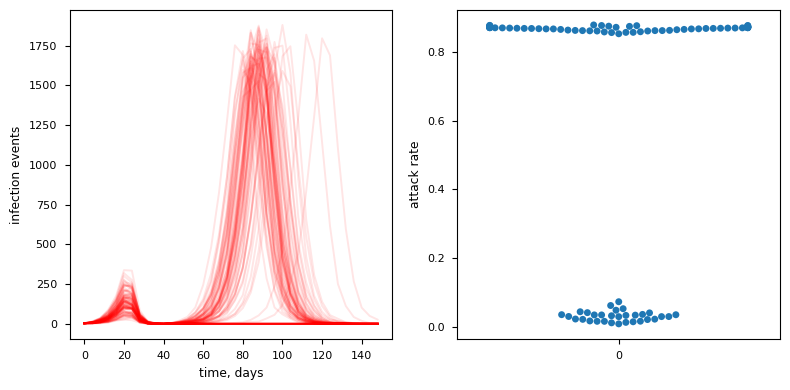

In [557]:
fig, axes = plt.subplots(1,2,figsize=(8,4))
df_inf = pd.read_csv('output_server/inf_times_day_lockdown_big_n_96_dT_24_dur_2688_T1_504_T2_504.csv')
df_inf.drop('Unnamed: 0',axis=1,inplace=True)
df_AR = pd.read_csv('output_server/AR_lockdown_big_n_96_dT_24_dur_2688_T1_504_T2_504.csv')
df_AR = df_AR.drop('Unnamed: 0',axis=1).T.reset_index(drop=True)

bins = np.arange(0,df_inf.max().max(),4)
for sim_id in df_inf.columns:
    #out_df.hist([sim_id],alpha=0.3, ax = ax, bins=np.arange(0,int(opt['simulation_time']/24),4))
    y,x = np.histogram(list(df_inf[sim_id][~pd.isna(df_inf[sim_id])].values), bins=bins)
    axes[0].plot(x[:-1],y, alpha=0.1, color='red')
axes[0].set_xlabel('time, days')
axes[0].set_ylabel('infection events')

sns.swarmplot(data=df_AR, ax=axes[1])
axes[1].set_ylabel('attack rate')
plt.tight_layout()
plt.savefig('plots/lockdown_big_dT24_504_504.png', dpi=150, bbox_inches='tight')
plt.show()

In [106]:
df_t = pd.read_csv('output_server/AR_lockdown_big_n_96_dT_24_dur_2688_T1_504_T2_504.csv')#.reset_index(drop=True)
#df_AR.drop('Unnamed: 0',axis=1,inplace=True)
df_t.drop('Unnamed: 0',axis=1).T #.#reset_index(drop=True)
df_AR

0         1         2         3         4         5         6  \
0  0.030907  0.866166  0.869825  0.867225  0.872424  0.870595  0.875505   

          7         8         9  ...        86        87        88       89  \
0  0.042557  0.860389  0.024071  ...  0.867803  0.031196  0.869343  0.02253   

         90        91       92        93        94        95  
0  0.016079  0.035336  0.87281  0.859908  0.872713  0.868477  

[1 rows x 96 columns]

In [354]:
os.listdir('output_server/ouput_server_new/')

['output_server']

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
/Users/bjoern/miniconda3/envs/net/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 55.2% of the points cannot be place

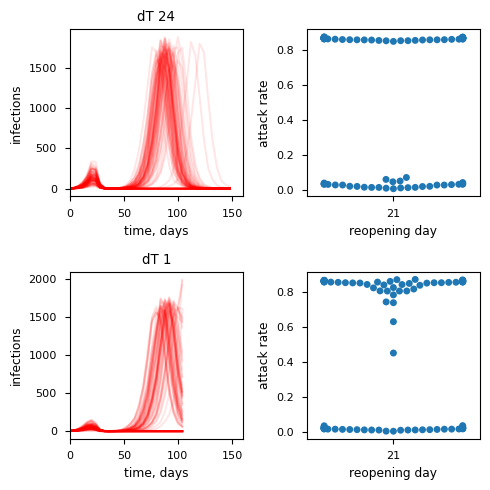

In [266]:
import os 

inf_names = [x for x in os.listdir('output_server/') if x.startswith('inf')]
inf_names = [
     'inf_times_day_lockdown_big_n_96_dT_24_dur_2688_T1_504_T2_504.csv',
     'inf_times_day_lockdown_big_n_96_dT_1_dur_2688_T1_504_T2_504.csv',
]

AR_names =  [
     'AR_lockdown_big_n_96_dT_24_dur_2688_T1_504_T2_504.csv',
     'AR_lockdown_big_n_96_dT_1_dur_2688_T1_504_T2_504.csv',
]
n = len(inf_names)
fig, axes = plt.subplots(len(inf_names),2, figsize=(5,5))

for i,inf_name in enumerate(inf_names):
    T2 = int(inf_name.split('_')[-1].split('.')[0])
    df = pd.read_csv('output_server/'+inf_name)
    df.drop('Unnamed: 0',axis=1,inplace=True)


    bins = np.arange(0,df.max().max(),4)
    for sim_id in df.columns:
        #out_df.hist([sim_id],alpha=0.3, ax = ax, bins=np.arange(0,int(opt['simulation_time']/24),4))
        y,x = np.histogram(list(df[sim_id][~pd.isna(df[sim_id])].values), bins=bins)
        axes[i][0].plot(x[:-1],y, alpha=0.1, color='red')
    axes[i][0].set_xlabel('time, days')
    axes[i][0].set_ylabel('infections')# events')
    axes[i][0].set_title(' '.join([x for x in inf_name.split('_')[7:9]]))
    axes[i][0].set_xlim(0,160)

    ar_name = 'AR_'+'_'.join(inf_name.split('_')[3:])
    df_AR = pd.read_csv('output_server/'+ar_name)
    df_AR = df_AR.drop('Unnamed: 0',axis=1).T.reset_index(drop=True)
    df_AR.columns = [int(T2/24)]
    sns.swarmplot(data=df_AR, ax=axes[i][1])
    axes[i][1].set_ylabel('attack rate')
    axes[i][1].set_xlabel('reopening day')

    
#plt.plot(x[:-1],y)
plt.tight_layout()
plt.show()

### Server Daten


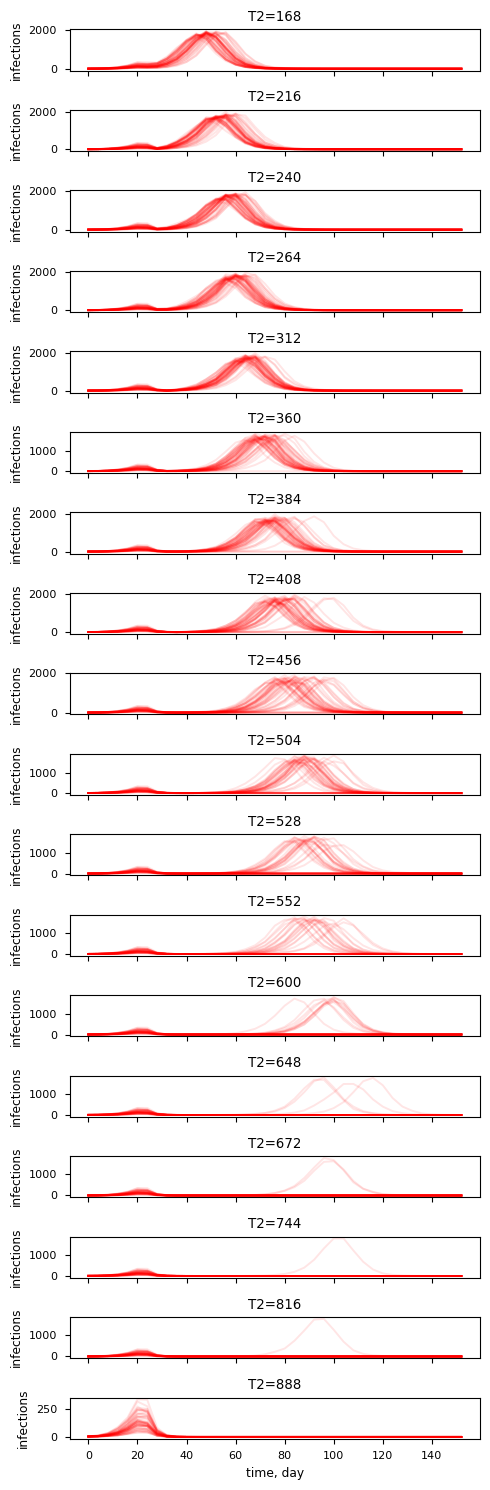

In [373]:
folder = 'output_server/ouput_server_new/'
inf_names = [x for x in os.listdir('output_server/ouput_server_new/') if 'inf_times_day_lockdown_big_n_48_dT_24_dur_3600_T1_504_T2' in x]
inf_names.sort()
n = len(inf_names)
df_AR_list = []

fig, axes = plt.subplots(len(inf_names),1, figsize=(5,15),sharex=True)

for i,inf_name in enumerate(inf_names):
    T2 = int(inf_name.split('_')[-1].split('.')[0])
    T1 = int(inf_name.split('_')[-3])
    df = pd.read_csv(folder+inf_name)
    df.drop('Unnamed: 0',axis=1,inplace=True)


    bins = np.arange(0,160,4)
    for sim_id in df.columns:
        #out_df.hist([sim_id],alpha=0.3, ax = ax, bins=np.arange(0,int(opt['simulation_time']/24),4))
        y,x = np.histogram(list(df[sim_id][~pd.isna(df[sim_id])].values), bins=bins)
        axes[i].plot(x[:-1],y, alpha=0.1, color='red')
    axes[i].set_title(f'{T2=}')
    axes[i].set_ylabel('infections')# events')

    ar_name = 'AR_'+'_'.join(inf_name.split('_')[3:])
    df_AR = pd.read_csv(folder+ar_name)
    df_AR = df_AR.drop('Unnamed: 0',axis=1).T.reset_index(drop=True)
    df_AR.columns = [int(T2/24)]
    df_AR_list.append(df_AR)
    #sns.swarmplot(data=df_AR, ax=axes[i][1])
    #axes[i][1].set_ylabel('attack rate')
    #axes[i][1].set_xlabel('reopening day')
axes[-1].set_xlabel('time, day')
plt.tight_layout()
plt.show()
#fig.savefig('plots/lockdown_inf_T24.png', bbox_inches='tight', dpi=150)

In [206]:
os.makedirs('output_server/delme/', exist_ok=True)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

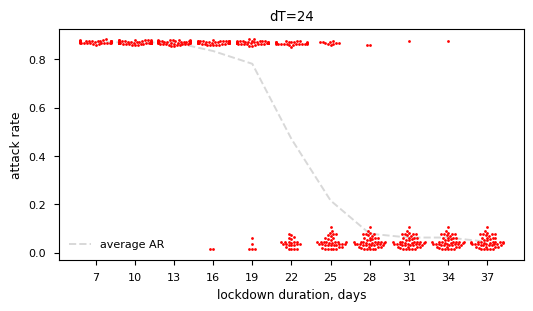

In [402]:

df_AR_all = pd.concat(df_AR_list,axis=1)
fig, ax = plt.subplots(1,1, figsize=(6,3))
#df_AR_all.mean().reset_index(drop=True).plot(linestyle='--',label='mean', color='k', alpha=0.4,)
AR_mean = []
for col in df_AR_all:
    if not (int(col)-7)%3:
        AR_mean.append((int(col)-7,df_AR_all[col].mean()))
        sns.swarmplot(y=df_AR_all[col], x= col, color='red', ax=ax, size=2)
#sns.swarmplot(data=df_AR_all, ax=ax, size=2, color='red',hue=None, edgecolor='red')
x,y = np.array(AR_mean).T
ax.plot(y, linestyle='--', color='gray', alpha=0.3, label = 'average AR')
ax.set_xlabel('lockdown duration, days')
ax.set_ylabel('attack rate')
ax.set_title('dT=24')
plt.legend(frameon=False)
fig.savefig('plots/lockdown_AR_T24.png', bbox_inches='tight', dpi=150)
plt.show()


In [ ]:
folder = 'output_server/ouput_server_new/'
inf_names = [x for x in os.listdir('output_server/ouput_server_new/') if 'inf_times_day_lockdown_big_n_48_dT_24_dur_3600_T1_504_T2' in x]
inf_names.sort()
n = len(inf_names)
df_AR_list = []

fig, axes = plt.subplots(len(inf_names),1, figsize=(5,15),sharex=True)

for i,inf_name in enumerate(inf_names):
    T2 = int(inf_name.split('_')[-1].split('.')[0])
    T1 = int(inf_name.split('_')[-3])
    df = pd.read_csv(folder+inf_name)
    df.drop('Unnamed: 0',axis=1,inplace=True)


    bins = np.arange(0,160,4)
    for sim_id in df.columns:
        #out_df.hist([sim_id],alpha=0.3, ax = ax, bins=np.arange(0,int(opt['simulation_time']/24),4))
        y,x = np.histogram(list(df[sim_id][~pd.isna(df[sim_id])].values), bins=bins)
        axes[i].plot(x[:-1],y, alpha=0.1, color='red')
    axes[i].set_title(f'{T2=}')
    axes[i].set_ylabel('infections')# events')

    ar_name = 'AR_'+'_'.join(inf_name.split('_')[3:])
    df_AR = pd.read_csv(folder+ar_name)
    df_AR = df_AR.drop('Unnamed: 0',axis=1).T.reset_index(drop=True)
    df_AR.columns = [int(T2/24)]
    df_AR_list.append(df_AR)
    #sns.swarmplot(data=df_AR, ax=axes[i][1])
    #axes[i][1].set_ylabel('attack rate')
    #axes[i][1].set_xlabel('reopening day')
axes[-1].set_xlabel('time, day')
plt.tight_layout()
plt.show()
#fig.savefig('plots/lockdown_inf_T24.png', bbox_inches='tight', dpi=150)

In [10]:
folder = 'output_server/output_server_2/'
durations = np.arange(168,960,72)
inf_names_all = [x for x in os.listdir('output_server/output_server_2/') if x.startswith('inf_times_day_lockdown_big_n_48_dT')]
inf_names_dT1 = [x for x in inf_names_all if (int(x.split('_')[-1].split('.')[0]) in durations)&('dT_1_'in x)]
inf_names_dT12 = [x for x in inf_names_all if (int(x.split('_')[-1].split('.')[0]) in durations)&('dT_12_'in x)]
inf_names_dT24 = [x for x in inf_names_all if (int(x.split('_')[-1].split('.')[0]) in durations)&('dT_24_'in x)]
inf_names_dT56 = [x for x in inf_names_all if (int(x.split('_')[-1].split('.')[0]) in durations)&('dT_56_'in x)]
inf_names_dT56.sort()
inf_names_dT24.sort()
inf_names_dT12.sort()
inf_names_dT1.sort()
n = len(inf_names_dT56)
df_AR_list = []

bins = np.arange(0,150,4)

inf_times_day_lockdown_big_n_48_dT_24_dur_3600_T1_504_T2_168.csv
inf_times_day_lockdown_big_n_48_dT_24_dur_3600_T1_504_T2_240.csv
inf_times_day_lockdown_big_n_48_dT_24_dur_3600_T1_504_T2_312.csv
inf_times_day_lockdown_big_n_48_dT_24_dur_3600_T1_504_T2_384.csv
inf_times_day_lockdown_big_n_48_dT_24_dur_3600_T1_504_T2_456.csv
inf_times_day_lockdown_big_n_48_dT_24_dur_3600_T1_504_T2_528.csv
inf_times_day_lockdown_big_n_48_dT_24_dur_3600_T1_504_T2_168.csv
inf_times_day_lockdown_big_n_48_dT_24_dur_3600_T1_504_T2_672.csv
inf_times_day_lockdown_big_n_48_dT_24_dur_3600_T1_504_T2_744.csv
inf_times_day_lockdown_big_n_48_dT_24_dur_3600_T1_504_T2_816.csv
inf_times_day_lockdown_big_n_48_dT_24_dur_3600_T1_504_T2_888.csv


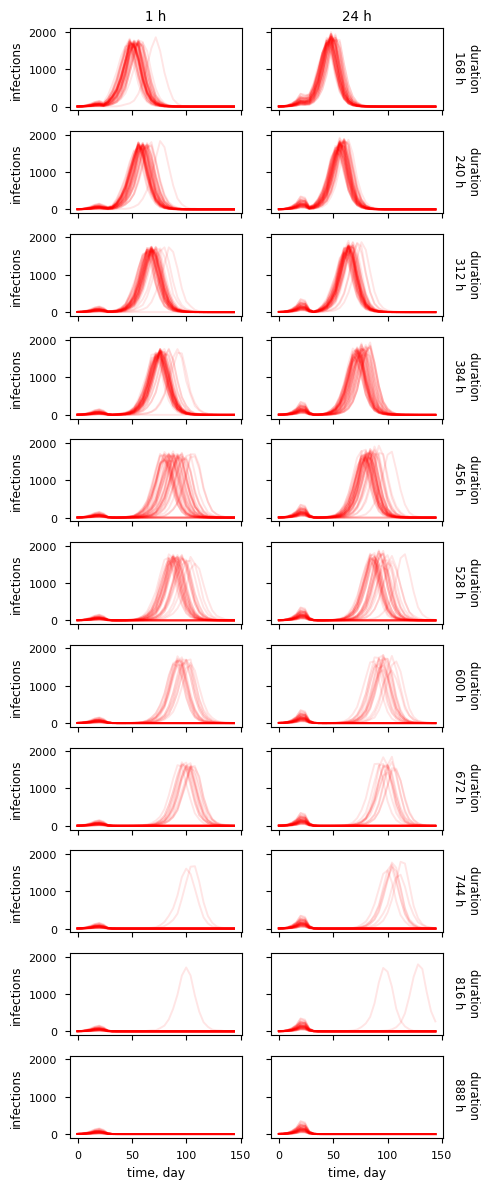

In [12]:
fig, axes = plt.subplots(int(n),2, figsize=(5,12),sharex=True, sharey=True, squeeze=False)

for i,dur in enumerate(durations):
    T2=dur

    axes[i][1].text(x=1.05,y=0.5,s=f'duration \n  {dur} h',
                    verticalalignment='center',
                    transform=axes[i][1].transAxes, 
                    rotation =-90,
                    fontsize='small')

    df_dT1 = pd.read_csv(folder+[x for x in inf_names_dT1 if 'T2_'+str(dur) in x][0])
    df_dT24 = pd.read_csv(folder+[x for x in inf_names_dT24 if 'T2_'+str(dur) in x][0])
    df_dT1.drop('Unnamed: 0',axis=1,inplace=True)
    df_dT24.drop('Unnamed: 0',axis=1,inplace=True)
    print([x for x in inf_names_dT24 if str(dur) in x][0])
    for sim_id in df_dT1.columns:
        #out_df.hist([sim_id],alpha=0.3, ax = ax, bins=np.arange(0,int(opt['simulation_time']/24),4))
        y,x = np.histogram(list(df_dT1[sim_id][~pd.isna(df_dT1[sim_id])].values), bins=bins)
        axes[i][0].plot(x[:-1],y, alpha=0.1, color='red')
    for sim_id in df_dT24.columns:
        #out_df.hist([sim_id],alpha=0.3, ax = ax, bins=np.arange(0,int(opt['simulation_time']/24),4))
        y,x = np.histogram(list(df_dT24[sim_id][~pd.isna(df_dT24[sim_id])].values), bins=bins)
        axes[i][1].plot(x[:-1],y, alpha=0.1, color='red')
    #axes[i][0].set_title(f'{T2=}')
    axes[i][0].set_ylabel('infections')# events')
    #if int(dur) == 600:
    #    break

for i,t in enumerate([1,24]):
    axes[0][i].set_title(f'{t} h')
    axes[-1][i].set_xlabel('time, day')

plt.tight_layout()
plt.show()
#fig.savefig('plots/24h_vs_1h_lockdown_infections.png', bbox_inches='tight', dpi=150)


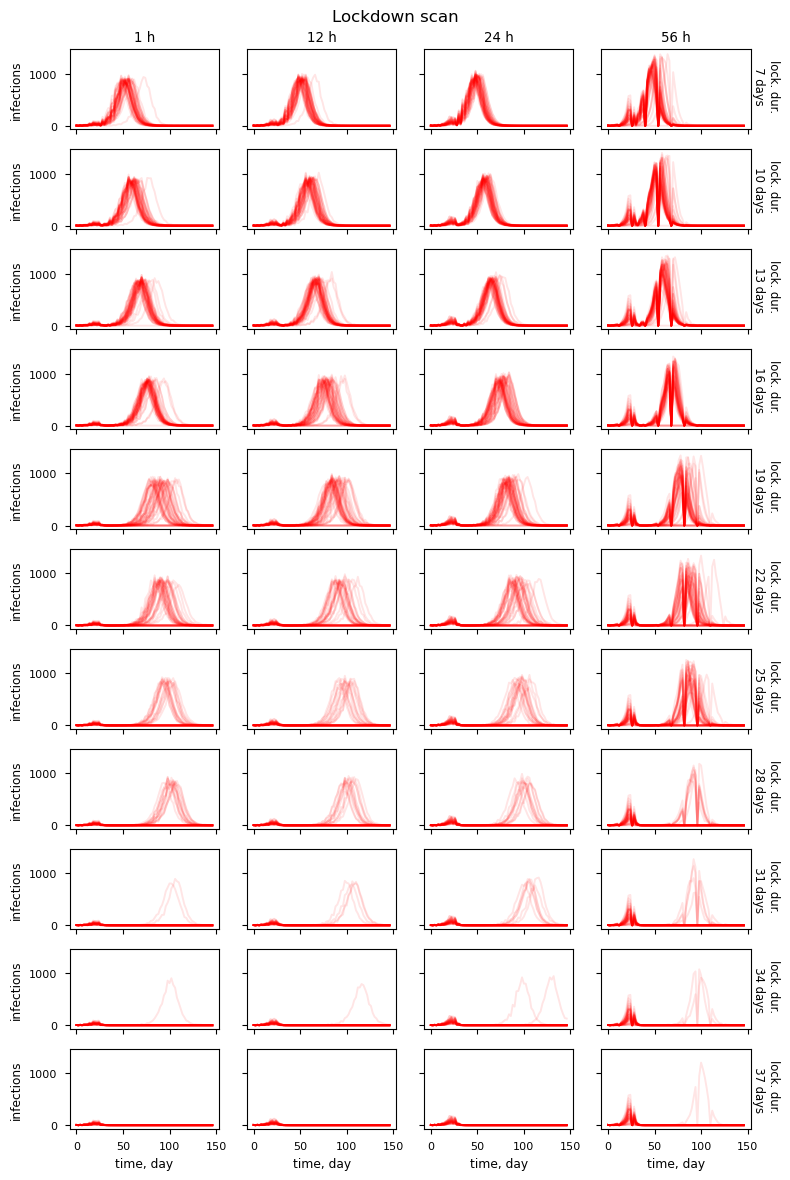

In [86]:
def plot_df_infections(df,ax, bins=np.arange(0,150,2)):
    for sim_id in df.columns:
        #out_df.hist([sim_id],alpha=0.3, ax = ax, bins=np.arange(0,int(opt['simulation_time']/24),4))
        y,x = np.histogram(list(df[sim_id][~pd.isna(df[sim_id])].values), bins=bins)
        ax.plot(x[:-1],y, alpha=0.1, color='red') 

in_listoflists = [inf_names_dT1,
                  inf_names_dT12,
                  inf_names_dT24,
                  inf_names_dT56,
                 ]
inf_names_all_1 = list(zip(*in_listoflists))

fig, axes = plt.subplots(len(inf_names_all_1),len(in_listoflists),squeeze=False, figsize=(8,12), sharex=True,sharey=True)
for ax in axes[-1,:]:
     ax.set_xlabel('time, day')
for i, t in enumerate([1,12,24,56]):
     axes[0,i].set_title(f'{t} h')     

for i,name_tuple in enumerate(inf_names_all_1):

        lockdown_duration = int(int(name_tuple[0].split('_')[-1].split('.')[0])/24) 
        
        axes[i,3].text(x=1.01,y=0.5,s=f'lock. dur.  \n  {lockdown_duration} days',
                        verticalalignment='center',
                        transform=axes[i][3].transAxes, 
                        rotation =-90,
                        fontsize='small')
        
        axes[i,0].set_ylabel('infections')
            
        df_dT1 = pd.read_csv(folder+name_tuple[0])
        df_dT12 = pd.read_csv(folder+name_tuple[1])
        df_dT24 = pd.read_csv(folder+name_tuple[2])
        df_dT56 = pd.read_csv(folder+name_tuple[3])
        df_dT1.drop('Unnamed: 0',axis=1,inplace=True)
        df_dT12.drop('Unnamed: 0',axis=1,inplace=True)
        df_dT24.drop('Unnamed: 0',axis=1,inplace=True)
        df_dT56.drop('Unnamed: 0',axis=1,inplace=True)
        plot_df_infections(df=df_dT1, ax=axes[i][0])
        plot_df_infections(df=df_dT12, ax=axes[i][1])
        plot_df_infections(df=df_dT24, ax=axes[i][2])
        plot_df_infections(df=df_dT56, ax=axes[i][3])

#plt.tight_layout()
fig.suptitle('Lockdown scan')
plt.tight_layout()
fig.savefig('plots/56_24_12_1_lockdown_infections_new.png', dpi=300, bbox_inches='tight')
plt.show()        

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

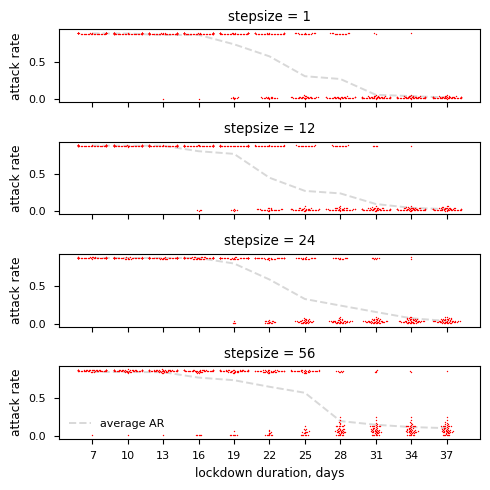

In [88]:
#for inf_time_list in [inf_names_dT1,inf_names_dT24]
temp_lockdown_dict = {1: inf_names_dT1,
                      12: inf_names_dT12,
                      24: inf_names_dT24,
                      56: inf_names_dT56,
                     }
fig, axes = plt.subplots(4,1, figsize=(5,5), squeeze=False, sharex=True)

for dur, inf_names in temp_lockdown_dict.items():
    if dur == 1:
        ax = axes[0,0]
    elif dur == 12:
        ax=axes[1,0]
    elif dur == 24:
        ax=axes[2,0]
    elif dur == 56:
        ax=axes[3,0]
    else:    
        print(f'{dur=} , not in list')
        break        
    df_AR_list = []
    for i, inf_name in enumerate(inf_names):
        T2 = int(inf_name.split('_')[-1].split('.')[0])
        #print(ar_name)
        ar_name = 'AR_'+'_'.join(inf_name.split('_')[3:])
        df_AR = pd.read_csv(folder+ar_name)
        df_AR = df_AR.drop('Unnamed: 0',axis=1).T.reset_index(drop=True)
        df_AR.columns = [int(T2/24)]
        df_AR_list.append(df_AR)

    df_AR_all = pd.concat(df_AR_list,axis=1)
    #fig, ax = plt.subplots(1,1, figsize=(6,3))
    #df_AR_all.mean().reset_index(drop=True).plot(linestyle='--',label='mean', color='k', alpha=0.4,)
    AR_mean = []
    for col in df_AR_all:
        if not (int(col)-7)%3:
            AR_mean.append((int(col)-7,df_AR_all[col].mean()))
            sns.swarmplot(y=df_AR_all[col], x= col, color='red', ax=ax, size=1)
    #sns.swarmplot(data=df_AR_all, ax=ax, size=2, color='red',hue=None, edgecolor='red')
    x,y = np.array(AR_mean).T
    ax.plot(y, linestyle='--', color='gray', alpha=0.3, label = 'average AR')
    ax.set_xlabel('lockdown duration, days')
    ax.set_ylabel('attack rate')
    ax.set_title(f'stepsize = {dur}')
    plt.legend(frameon=False)
plt.tight_layout()    
fig.savefig('plots/56_24_12_1_lockdown_AR.png', bbox_inches='tight', dpi=150)
plt.show()


In [ ]:
fig, axes = plt.subplots(int(n),2, figsize=(5,12),sharex=True, sharey=True, squeeze=False)

for i,dur in enumerate(durations):
    T2=dur

    axes[i][1].text(x=1.05,y=0.5,s=f'duration \n  {dur} h',
                    verticalalignment='center',
                    transform=axes[i][1].transAxes, 
                    rotation =-90,
                    fontsize='small')

    df_dT1 = pd.read_csv(folder+[x for x in inf_names_dT1 if 'T2_'+str(dur) in x][0])
    df_dT24 = pd.read_csv(folder+[x for x in inf_names_dT24 if 'T2_'+str(dur) in x][0])
    df_dT1.drop('Unnamed: 0',axis=1,inplace=True)
    df_dT24.drop('Unnamed: 0',axis=1,inplace=True)
    print([x for x in inf_names_dT24 if str(dur) in x][0])
    for sim_id in df_dT1.columns:
        #out_df.hist([sim_id],alpha=0.3, ax = ax, bins=np.arange(0,int(opt['simulation_time']/24),4))
        y,x = np.histogram(list(df_dT1[sim_id][~pd.isna(df_dT1[sim_id])].values), bins=bins)
        axes[i][0].plot(x[:-1],y, alpha=0.1, color='red')
    for sim_id in df_dT24.columns:
        #out_df.hist([sim_id],alpha=0.3, ax = ax, bins=np.arange(0,int(opt['simulation_time']/24),4))
        y,x = np.histogram(list(df_dT24[sim_id][~pd.isna(df_dT24[sim_id])].values), bins=bins)
        axes[i][1].plot(x[:-1],y, alpha=0.1, color='red')
    #axes[i][0].set_title(f'{T2=}')
    axes[i][0].set_ylabel('infections')# events')
    #if int(dur) == 600:
    #    break

for i,t in enumerate([1,24]):
    axes[0][i].set_title(f'{t} h')
    axes[-1][i].set_xlabel('time, day')

plt.tight_layout()
plt.show()
#fig.savefig('plots/24h_vs_1h_lockdown_infections.png', bbox_inches='tight', dpi=150)

In [71]:
from matplotlib.animation import FuncAnimation
from IPython import display


fig, ax = plt.subplots(1,1,figsize=(4,3),sharex=True, sharey=True)
ax.set_ylabel('infections')
ax.set_xlabel('time, days')
ax.set_xlim(0,150) #!!
ax.set_ylim(0,2000) #!!



def lockdown_ani(dur,lines, temp_text):

    df_dT1 = pd.read_csv(folder+[x for x in inf_names_dT1 if 'T2_'+str(dur) in x][0])
    df_dT1.drop('Unnamed: 0',axis=1,inplace=True)
    temp_text.set_text(f'{int(dur/24)} days lockdown')

    for i,sim_id in enumerate(df_dT1.columns):
        #out_df.hist([sim_id],alpha=0.3, ax = ax, bins=np.arange(0,int(opt['simulation_time']/24),4))
        y,x = np.histogram(list(df_dT1[sim_id][~pd.isna(df_dT1[sim_id])].values), bins=bins)
        lines[i].set_data(x[:-1],y)
    
    

lines_dict = {}

for i in range(48):
    line = ax.plot([],[])[0]
    line.set_color('red')
    line.set_alpha(0.1)
    lines_dict[i] = line

temp_text = ax.text(140, 1900, '', ha='right', va='top', fontsize=8)


anim_created = FuncAnimation(fig, lockdown_ani, frames=durations, interval=300, fargs=(lines_dict,temp_text))


plt.tight_layout()
video = anim_created.to_html5_video()
html = display.HTML(video)
display.display(html) 
anim_created.save('lockdown.mp4', dpi=150)
# good practice to close the plt object.
plt.close()

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 400x300 -pix_fmt rgba -r 3.3333333333333335 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /var/folders/gt/s6pdfdj96zj_zvbg5c6lj1nm0000gn/T/tmpsmeifcqe/temp.m4v


INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 600x450 -pix_fmt rgba -r 3.3333333333333335 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y lockdown.mp4
